In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.65)

In [2]:
def random_pmf(k):
    return 3 / (np.square(np.pi) * np.square(k))

In [3]:
def random_cdf(k):
    prob = np.zeros(k+1)
    for i in range(0, k+1):
        prob[i] = random_pmf(i)
    return np.cumsum(prob)[-1]

In [4]:
def random_inv_cdf(p):
    low = 0.0
    high = 0.0
    for x in range(1, 20):
        s = random_pmf(x)
        high += s
        if p>0.5:
            p = p - 0.5
            if p>=low and p<=high:
                return x
            low += s
        else:
            if p>=low and p<=high:
                return (-1 * x)
            low += s
    return np.random.randint(100)

In [5]:
def generate_randomDist_samples(no_of_samples):
    X = []
    U = np.random.uniform(0, 1, no_of_samples)
    for u in U:
        X.append(random_inv_cdf(u))
    return X

In [6]:
def experiment(no_of_times, no_of_samples, distribution):
    sample_mean = []
    counter1 = 0
    counter2 = 0
    counter3 = 0
    confidence_interval_1 = [9.99, 10.01]
    confidence_interval_2 = [9.9, 10.1]
    
    for i in range(no_of_times):
        sample_mean.append(np.mean(generate_randomDist_samples(no_of_samples)))
    
    mu = np.mean(sample_mean)
    std = np.std(sample_mean)
    
    upper_limit = mu + 1.96 * (std / np.sqrt(n_samples))
    lower_limit = mu - 1.96 * (std / np.sqrt(n_samples))
    
    #actual_mean = 10
    
    for each in sample_mean:
        if each >= confidence_interval_1[0] and each <= confidence_interval_1[1]:
            counter1 += 1
        if each >= confidence_interval_2[0] and each <= confidence_interval_2[1]:
            counter2 += 1
        #if each > upper_limit or each < lower_limit:
            #counter3 += 1
    
    plt.hist(sample_mean, bins = 1000, edgecolor='black', linewidth=1.2)
    plt.text(1, 30, r'$\mu=%f,\ \sigma=%f$' % (mu, std))
    plt.xlabel('Observations')
    plt.ylabel('Frequency')
    plt.title('Histogram for sample_size = %d' %  (no_of_samples))
    plt.grid(True)
    plt.show()
    
    return (mu, std, counter1, counter2, upper_limit, lower_limit, counter3)

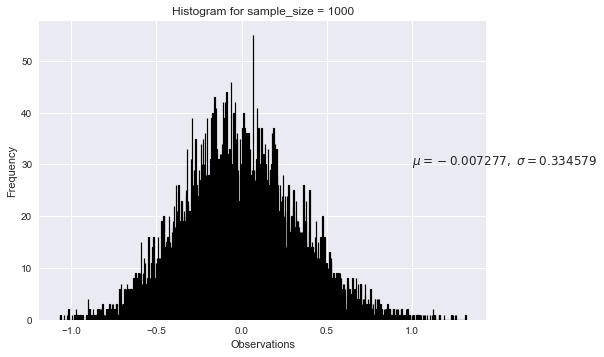

95% Confidence Interval for N = 1000 is [-0.028014 , 0.013460]


In [7]:
n_samples = 1000

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Nitesh')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))

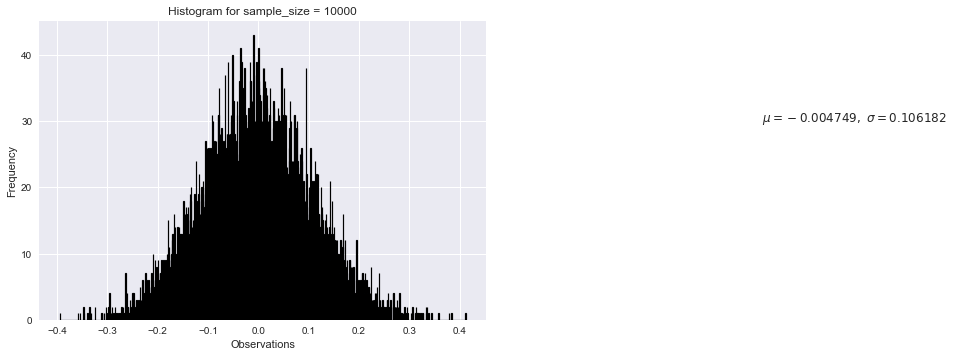

95% Confidence Interval for N = 10000 is [-0.006830 , -0.002668]


In [8]:
n_samples = 10000

(mu, std, counter1,counter2, upper_limit, lower_limit, counter3) = experiment(10000, n_samples, 'Nitesh')

print('95%% Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))